<a href="https://colab.research.google.com/github/chatterjeerajdeep/explore-machine-learning/blob/main/Vanilla_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import math
import numpy as np

My idea here is to implement a simple RNN architecture and realise the idea of how to process sequences.

In [2]:
# Create a sequence - I chose to create a sequence of squares of numbers
squares = [x*x for x in range(200)]

In [3]:
# Let each of my sequences have 50 data points each and the output is the 51st data point
sequence_len = 50

X_train = []
y_train = []

# X_train is a batch of 100, where each batch has 50 data points
# y_train is also a batch of 100, where each batch has 1 data point
for i in range(0,100):
    X_train.append(squares[i:i+sequence_len])
    y_train.append(squares[i+sequence_len])
  
X_train = np.array(X_train)
X_train = np.expand_dims(X_train, axis=2)

y_train = np.array(y_train)
y_train = np.expand_dims(y_train, axis=1)

In [4]:
# similarly let's chunk out the data for test
X_test = []
y_test = []

for i in range(100,150):
    X_test.append(squares[i:i+sequence_len])
    y_test.append(squares[i+sequence_len])
  
X_test = np.array(X_test)
X_test = np.expand_dims(X_test, axis=2)

y_test = np.array(y_test)
y_test = np.expand_dims(y_test, axis=1)

In [10]:
# build the model
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(50,1), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the model

model.fit(X_train,y_train, epochs=200, verbose=2)

Epoch 1/200
4/4 - 1s - loss: 71209736.0000
Epoch 2/200
4/4 - 0s - loss: 43110688.0000
Epoch 3/200
4/4 - 0s - loss: 19061282.0000
Epoch 4/200
4/4 - 0s - loss: 5488354.0000
Epoch 5/200
4/4 - 0s - loss: 702669.6250
Epoch 6/200
4/4 - 0s - loss: 53791.5117
Epoch 7/200
4/4 - 0s - loss: 21300.2031
Epoch 8/200
4/4 - 0s - loss: 21033.3320
Epoch 9/200
4/4 - 0s - loss: 21522.9297
Epoch 10/200
4/4 - 0s - loss: 22526.5176
Epoch 11/200
4/4 - 0s - loss: 26664.6094
Epoch 12/200
4/4 - 0s - loss: 23777.5293
Epoch 13/200
4/4 - 0s - loss: 22904.1875
Epoch 14/200
4/4 - 0s - loss: 21086.8691
Epoch 15/200
4/4 - 0s - loss: 25017.2305
Epoch 16/200
4/4 - 0s - loss: 219748.0781
Epoch 17/200
4/4 - 0s - loss: 25882.9609
Epoch 18/200
4/4 - 0s - loss: 123251.0312
Epoch 19/200
4/4 - 0s - loss: 289973.9062
Epoch 20/200
4/4 - 0s - loss: 23278.7480
Epoch 21/200
4/4 - 0s - loss: 53513.0547
Epoch 22/200
4/4 - 0s - loss: 27209.3066
Epoch 23/200
4/4 - 0s - loss: 206681.4844
Epoch 24/200
4/4 - 0s - loss: 79533.3750
Epoch 25/

In [7]:
from matplotlib import pyplot as plt

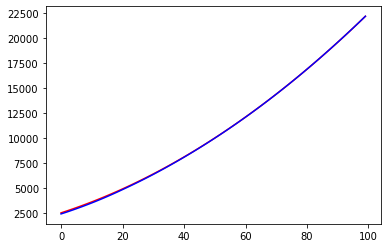

In [12]:
# plot the results in train
train_predict = model.predict(X_train)
plt.plot(y_train[:], 'r')
plt.plot(train_predict[:],'b')

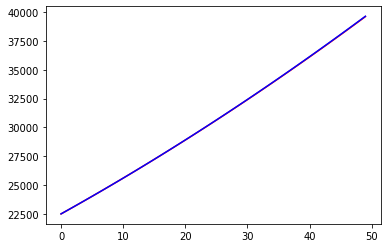

In [13]:
# plot the results in test
test_predict= model.predict(X_test)
plt.plot(y_test[:], 'r')
plt.plot(test_predict[:],'b')